In [270]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,KFold
from sklearn.model_selection import cross_val_score,KFold
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from glob import glob


## Data extracting ##

In [736]:
df_1 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\singapore Flat resale price predicting\Data File\File_1_1990 to 1999.csv")
df_1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [737]:
df_2 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\singapore Flat resale price predicting\Data File\File_2_2000 to 2012.csv")
df_2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [738]:
df_3 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\singapore Flat resale price predicting\Data File\File_3_FromJan2015toDec2016.csv")
df_3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [739]:
df_4 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\singapore Flat resale price predicting\Data File\File_4_FromMar2012toDec2014.csv")
df_4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [745]:
df_5 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\singapore Flat resale price predicting\Data File\File_5_fromJan2017onwards.csv")
df_5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
190207,2024-09,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,850000.0
190208,2024-09,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,800000.0
190209,2024-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,62 years 03 months,770000.0
190210,2024-09,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,66 years 10 months,1068888.0


In [948]:
df = pd.concat([df_1,df_2,df_3,df_4,df_5],ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
936410,2024-09,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,850000.0,62 years 10 months
936411,2024-09,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,800000.0,62 years 10 months
936412,2024-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,770000.0,62 years 03 months
936413,2024-09,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,1068888.0,66 years 10 months


In [949]:
df.size

10300565

## No of rows ##

In [950]:
print(f" columns : {df.shape[1]}")

 columns : 11


## No of Columns ##

In [951]:
print(f"rows : {df.shape[0]}")

rows : 936415


In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936415 entries, 0 to 936414
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                936415 non-null  object 
 1   town                 936415 non-null  object 
 2   flat_type            936415 non-null  object 
 3   block                936415 non-null  object 
 4   street_name          936415 non-null  object 
 5   storey_range         936415 non-null  object 
 6   floor_area_sqm       936415 non-null  float64
 7   flat_model           936415 non-null  object 
 8   lease_commence_date  936415 non-null  int64  
 9   resale_price         936415 non-null  float64
 10  remaining_lease      227365 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.6+ MB


In [953]:
df.duplicated().sum()

1902

In [954]:
df = df.drop_duplicates()

In [955]:
df.duplicated().sum()

0

## Remaining lease ## 

In [956]:
df[['years', 'months']] = df['remaining_lease'].str.extract(r'(\d+)\s*year.*?(\d+)\s*month')

In [957]:
df[['years','months']]

,years,months
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
936410,62,10
936411,62,10
936412,62,03
936413,66,10


In [958]:
df['years'].isna().sum()

760239

In [959]:
df['months'].isna().sum()

760239

In [960]:
df['years'] = df['years'].fillna(0)

In [961]:
df['months'] = df['months'].fillna(0)

In [962]:
df['years'] = df['years'].astype('int')
df['months'] = df['months'].astype('int')

In [963]:
df['remaining_lease'] = df['years'] + df['months'] / 12

In [964]:
df['remaining_lease'].isna().sum()

0

In [965]:
df['remaining_lease'].size

934513

In [966]:
df['remaining_lease'].value_counts()


remaining_lease
0.000000     760239
94.833333      1701
94.750000      1684
94.916667      1663
94.666667      1519
              ...  
66.000000         1
97.416667         1
97.250000         1
96.833333         1
97.750000         1
Name: count, Length: 623, dtype: int64

In [967]:
df = df[df['remaining_lease'] !=0]

In [968]:
df['remaining_lease'].value_counts()


remaining_lease
94.833333    1701
94.750000    1684
94.916667    1663
94.666667    1519
94.583333    1457
             ... 
97.083333       1
97.750000       1
97.416667       1
97.250000       1
97.583333       1
Name: count, Length: 622, dtype: int64

In [969]:
df['remaining_lease'] = df['remaining_lease'].astype('int')

In [970]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
years                    int32
months                   int32
dtype: object

In [971]:
df.reset_index(drop=True,inplace=True)

In [972]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,years,months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,61,61,4
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,60,60,7


In [973]:
df = df.drop(columns=['years','months'])

In [974]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,61
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,60


In [975]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
dtype: object

In [978]:
for col in df.columns:
    print(f"{col} : {len(df[col].unique())}")

month : 93
town : 26
flat_type : 7
block : 2711
street_name : 567
storey_range : 17
floor_area_sqm : 172
flat_model : 21
lease_commence_date : 55
resale_price : 3886
remaining_lease : 57


In [979]:
for col in df.columns:
    print(f"{col} : {df[col].value_counts()}")

month : month
2024-07    2751
2021-08    2459
2021-11    2418
2024-01    2403
2021-07    2400
           ... 
2017-01    1034
2017-02    1002
2018-01     947
2020-04     384
2020-05     335
Name: count, Length: 93, dtype: int64
town : town
SENGKANG           14391
PUNGGOL            12905
WOODLANDS          12388
YISHUN             11951
TAMPINES           11670
JURONG WEST        11507
BEDOK               9210
HOUGANG             8825
CHOA CHU KANG       7977
ANG MO KIO          7203
BUKIT BATOK         6833
BUKIT MERAH         6661
BUKIT PANJANG       6345
TOA PAYOH           5448
KALLANG/WHAMPOA     5290
PASIR RIS           5091
SEMBAWANG           4818
QUEENSTOWN          4800
GEYLANG             4270
CLEMENTI            3923
JURONG EAST         3581
SERANGOON           3203
BISHAN              3094
CENTRAL AREA        1391
MARINE PARADE       1065
BUKIT TIMAH          434
Name: count, dtype: int64
flat_type : flat_type
4 ROOM              73393
5 ROOM              43321
3 ROOM    

In [980]:
df['month'] = pd.to_datetime(df['month'],format='%Y-%m',errors='coerce')

In [981]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                 int32
dtype: object

In [982]:
df['year'] = pd.to_datetime(df['month'],errors='coerce').dt.year

In [983]:
df['month'] = pd.to_datetime(df['month'],errors='coerce').dt.month

In [984]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,61,2017
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,60,2017
2,1,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,62,2017
3,1,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,62,2017
4,1,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,62,2017


In [985]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
dtype: object

In [986]:
df['block'] = df['block'].str.split(r'(\D)',expand=True)[0].astype('int64')

In [987]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [988]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Adjoined flat', 'Premium Apartment',
       'Model A-Maisonette', 'Maisonette', 'Model A2', 'Type S1',
       'Type S2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [989]:
df['flat_model'] = df['flat_model'].str.upper()

In [990]:
df['flat_model'] = df['flat_model'].replace({'NEW GENERATION':'NEW-GENERATION','MODEL A':'MODEL-A','MULTI GENERATION':'MULTI-GENERATION',
                                             'MODEL A2':'MODEL-A2'})

In [991]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW-GENERATION', 'DBSS', 'STANDARD', 'APARTMENT',
       'SIMPLIFIED', 'MODEL-A', 'ADJOINED FLAT', 'PREMIUM APARTMENT',
       'MODEL A-MAISONETTE', 'MAISONETTE', 'MODEL-A2', 'TYPE S1',
       'TYPE S2', 'TERRACE', 'IMPROVED-MAISONETTE', 'PREMIUM MAISONETTE',
       'MULTI-GENERATION', 'PREMIUM APARTMENT LOFT', '2-ROOM', '3GEN'],
      dtype=object)

In [992]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [993]:
df['flat_type'] = df['flat_type'].replace({'MULTI GENERATION':'MULTI-GENERATION'})

In [994]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [995]:
df['age_of_property'] = df['year'] - df['lease_commence_date']

In [996]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property
0,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,IMPROVED,1979,232000.0,61,2017,38
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,NEW-GENERATION,1978,250000.0,60,2017,39


In [997]:
df['storey'] = df['storey_range'].str.split("TO",expand=True)[0]

In [998]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey
0,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,IMPROVED,1979,232000.0,61,2017,38,10
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,NEW-GENERATION,1978,250000.0,60,2017,39,01


In [999]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                  object
dtype: object

In [1000]:
df['storey'] = df['storey'].astype('int')

In [1001]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
dtype: object

In [1002]:
df = df.drop(['storey_range'],axis=1)

In [1003]:
df = df.drop(['street_name'],axis=1)

In [1004]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey
0,1,ANG MO KIO,2 ROOM,406,44.0,IMPROVED,1979,232000.0,61,2017,38,10
1,1,ANG MO KIO,3 ROOM,108,67.0,NEW-GENERATION,1978,250000.0,60,2017,39,1


In [1005]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
dtype: object

In [1006]:
df.index

RangeIndex(start=0, stop=174274, step=1)

In [1007]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey
0,1,ANG MO KIO,2 ROOM,406,44.0,IMPROVED,1979,232000.0,61,2017,38,10
1,1,ANG MO KIO,3 ROOM,108,67.0,NEW-GENERATION,1978,250000.0,60,2017,39,1


In [1008]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
age_of_property        0
storey                 0
dtype: int64

## Featuring new feature ##

In [1009]:
df['holding_period'] = (df['year'] - df['lease_commence_date'])

In [1010]:
df['holding_period'].unique()

array([38, 39, 37, 41, 40, 36,  6,  5, 21, 29, 32, 31, 33, 34, 30, 35, 16,
       12, 28,  7, 45, 17, 24, 44, 25, 27, 19, 13, 20, 46, 42, 47, 48, 43,
        4,  9, 18, 15, 14, 22, 11, 49, 26, 51, 10,  8, 50, 23,  3,  2, 52,
       53, 54,  1, 55, 56, 57, 58], dtype=int64)

In [1011]:
df['rate_per_sqm'] = (df['resale_price']/df['floor_area_sqm']).round(2)

In [1012]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
0,1,ANG MO KIO,2 ROOM,406,44.0,IMPROVED,1979,232000.0,61,2017,38,10,38,5272.73
1,1,ANG MO KIO,3 ROOM,108,67.0,NEW-GENERATION,1978,250000.0,60,2017,39,1,39,3731.34


In [1013]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
holding_period           int64
rate_per_sqm           float64
dtype: object

In [1014]:
df['rate_per_sqm'] = df['rate_per_sqm'].astype('int')

In [1015]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
holding_period           int64
rate_per_sqm             int32
dtype: object

In [1016]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
0,1,ANG MO KIO,2 ROOM,406,44.0,IMPROVED,1979,232000.0,61,2017,38,10,38,5272
1,1,ANG MO KIO,3 ROOM,108,67.0,NEW-GENERATION,1978,250000.0,60,2017,39,1,39,3731


## Descriptive Statistics ##

In [1017]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,174274.0,6.524278,3.356739,1.0,4.0,7.0,9.0,12.0
block,174274.0,366.332144,252.651019,1.0,146.0,319.0,548.0,999.0
floor_area_sqm,174274.0,97.100111,24.054562,31.0,82.0,93.0,112.0,249.0
lease_commence_date,174274.0,1996.088625,14.084981,1966.0,1985.0,1996.0,2011.0,2020.0
resale_price,174274.0,503515.324403,175478.826032,140000.0,375000.0,472000.0,600000.0,1588000.0
remaining_lease,174274.0,74.003954,14.002368,41.0,63.0,74.0,88.0,97.0
year,174274.0,2020.615898,2.203737,2017.0,2019.0,2021.0,2022.0,2024.0
age_of_property,174274.0,24.527273,13.971671,1.0,11.0,25.0,36.0,58.0
storey,174274.0,7.753572,5.934059,1.0,4.0,7.0,10.0,49.0
holding_period,174274.0,24.527273,13.971671,1.0,11.0,25.0,36.0,58.0


In [1018]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
age_of_property        0
storey                 0
holding_period         0
rate_per_sqm           0
dtype: int64

In [1020]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
holding_period           int64
rate_per_sqm             int32
dtype: object

In [1021]:
num_cols = df.select_dtypes(include='number')
num_cols

,month,block,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
0,1,406,44.0,1979,232000.0,61,2017,38,10,38,5272
1,1,108,67.0,1978,250000.0,60,2017,39,1,39,3731
2,1,602,67.0,1980,262000.0,62,2017,37,1,37,3910
3,1,465,68.0,1980,265000.0,62,2017,37,4,37,3897
4,1,601,67.0,1980,265000.0,62,2017,37,1,37,3955
...,...,...,...,...,...,...,...,...,...,...,...
174269,9,358,146.0,1988,850000.0,62,2024,36,1,36,5821
174270,9,361,146.0,1988,800000.0,62,2024,36,1,36,5479
174271,9,606,147.0,1987,770000.0,62,2024,37,1,37,5238
174272,9,641,164.0,1992,1068888.0,66,2024,32,7,32,6517


In [1022]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,town,flat_type,flat_model
0,ANG MO KIO,2 ROOM,IMPROVED
1,ANG MO KIO,3 ROOM,NEW-GENERATION
2,ANG MO KIO,3 ROOM,NEW-GENERATION
3,ANG MO KIO,3 ROOM,NEW-GENERATION
4,ANG MO KIO,3 ROOM,NEW-GENERATION
...,...,...,...
174269,YISHUN,EXECUTIVE,MAISONETTE
174270,YISHUN,EXECUTIVE,MAISONETTE
174271,YISHUN,EXECUTIVE,APARTMENT
174272,YISHUN,EXECUTIVE,APARTMENT


In [1023]:
skew_cols_1 = num_cols[['floor_area_sqm','resale_price','remaining_lease','rate_per_sqm']]
skew_cols_1

,floor_area_sqm,resale_price,remaining_lease,rate_per_sqm
0,44.0,232000.0,61,5272
1,67.0,250000.0,60,3731
2,67.0,262000.0,62,3910
3,68.0,265000.0,62,3897
4,67.0,265000.0,62,3955
...,...,...,...,...
174269,146.0,850000.0,62,5821
174270,146.0,800000.0,62,5479
174271,147.0,770000.0,62,5238
174272,164.0,1068888.0,66,6517


# Data Distirbution #

In [1024]:
for col in skew_cols_1:
    print(f"{col} : {(skew(df[col]))}")

floor_area_sqm : 0.2578153963532973
resale_price : 0.9401979938538814
remaining_lease : -0.0068267787774851955
rate_per_sqm : 1.3444456873589432


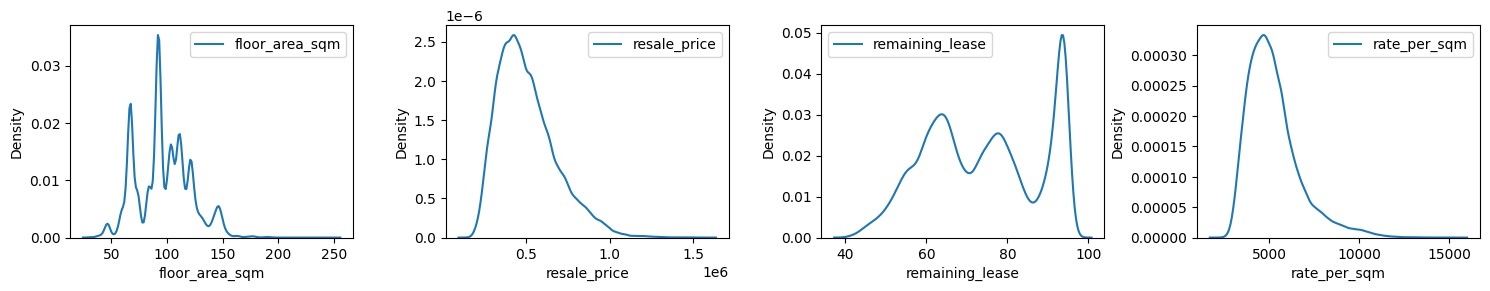

In [1025]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(skew_cols_1, 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(df[col], label=col)
    plt.legend()
plt.tight_layout()
plt.show()

In [1026]:
def get_skew(df,column):
    df[column] = df[column].apply(lambda x:np.log(x+1))
    #return df[column]

In [1027]:
get_skew(df,'floor_area_sqm')
#get_skew(df,'resale_price')
#get_skew(df,'remaining_lease')
get_skew(df,'rate_per_sqm')

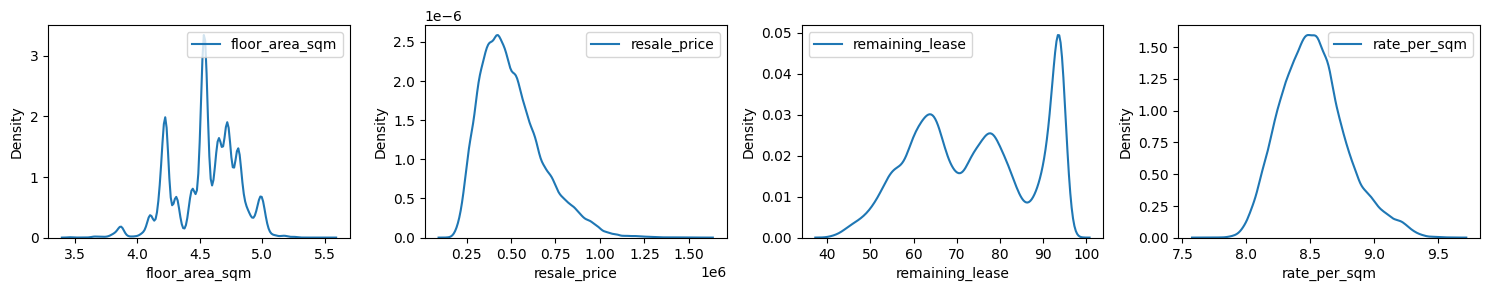

In [1028]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(skew_cols_1, 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(df[col], label=col)
    plt.legend()
plt.tight_layout()
plt.show()

In [1030]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
holding_period           int64
rate_per_sqm           float64
dtype: object

In [1031]:
df['rate_per_sqm'] = df['rate_per_sqm'].astype('int')

In [1032]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
holding_period           int64
rate_per_sqm             int32
dtype: object

In [1033]:
df['rate_per_sqm'].unique()

array([8, 9, 7])

In [1034]:
df['remaining_lease'].unique()

array([61, 60, 62, 58, 59, 63, 93, 94, 78, 70, 67, 68, 66, 65, 69, 64, 83,
       87, 71, 92, 54, 82, 75, 55, 74, 72, 80, 86, 79, 53, 57, 52, 51, 56,
       95, 90, 81, 84, 85, 77, 88, 50, 73, 48, 89, 91, 49, 76, 96, 47, 46,
       45, 97, 44, 43, 42, 41])

# Outliers Removal #

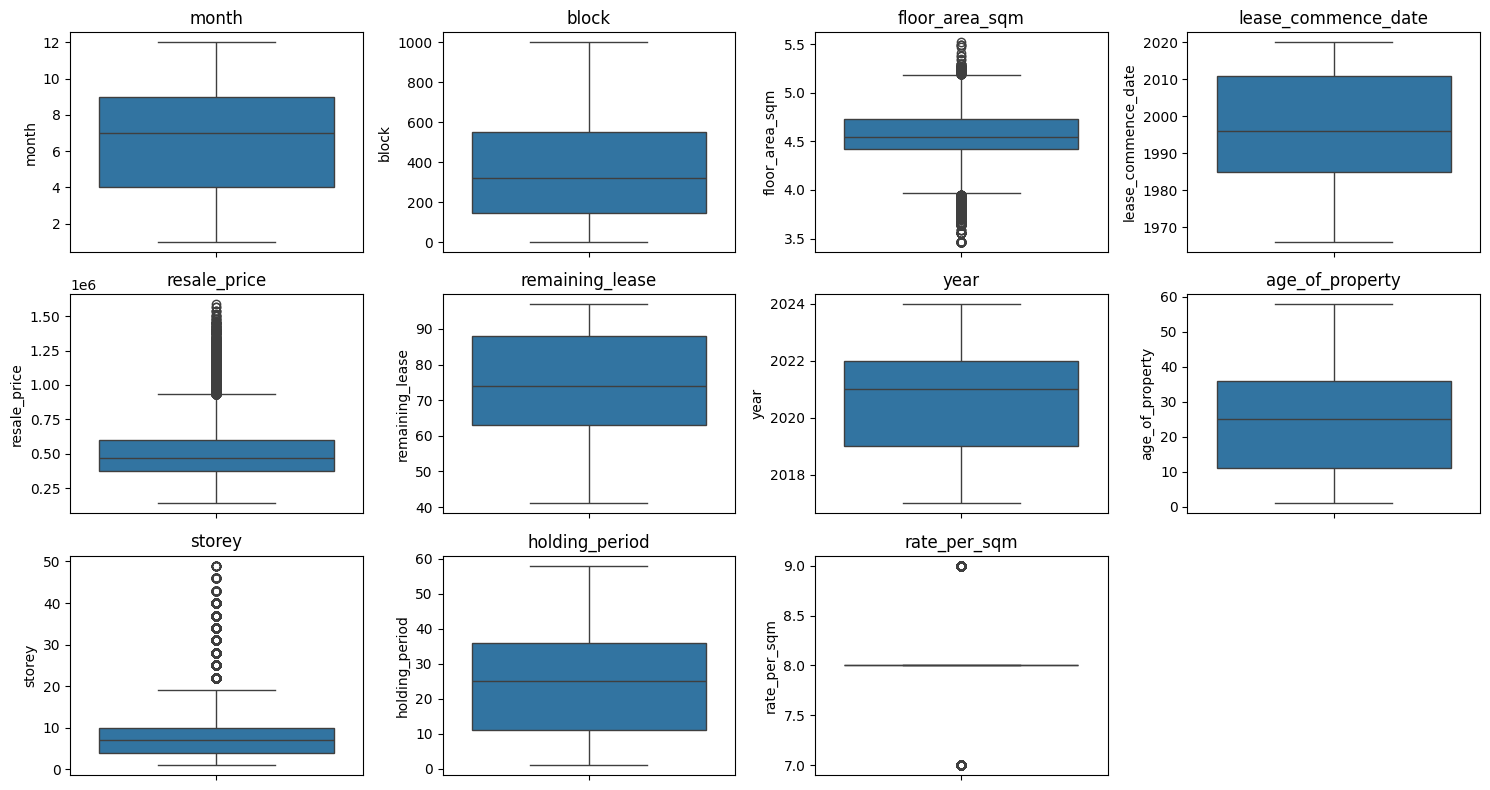

In [1035]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [1036]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [1037]:
outlier(df,'floor_area_sqm')
outlier(df,'resale_price')
#outlier(df,'remaining_lease')
#outlier(df,'rate_per_sqm')
#outlier(df,'lease_commence_date')
#outlier(df,'holding_period')
outlier(df,'storey')
#outlier(df,'age_of_property')


## Unique values in each columns ##

In [1038]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
town : ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
flat_type : ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
block : [406 108 602 465 601 447 218 571 534 233 235 219 536 570 624 625 119 255
 211 584 118 256 302 509 472 475 629 131 254 470 463 207 304 646 328 588
 101 520 716 310 613 548 550 151  54  50 105 528  77 116  57 709  42  55
  75  37 117 149  35  34  80  78 135 148  81 142 124 705 554 508 720  10
 185 111 220 603  21 672 415 763 805 723 722 640 160  94  22 407 167 181
 166 109 260 275 214 182 448 128 303 231 134 342 530 145 537 213 130 212
 226 247 169 360 217 178 265 301 289 244 248 290 395 642 106 210 386 394
 190 

In [1039]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                    int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int32
age_of_property          int64
storey                   int32
holding_period           int64
rate_per_sqm             int32
dtype: object

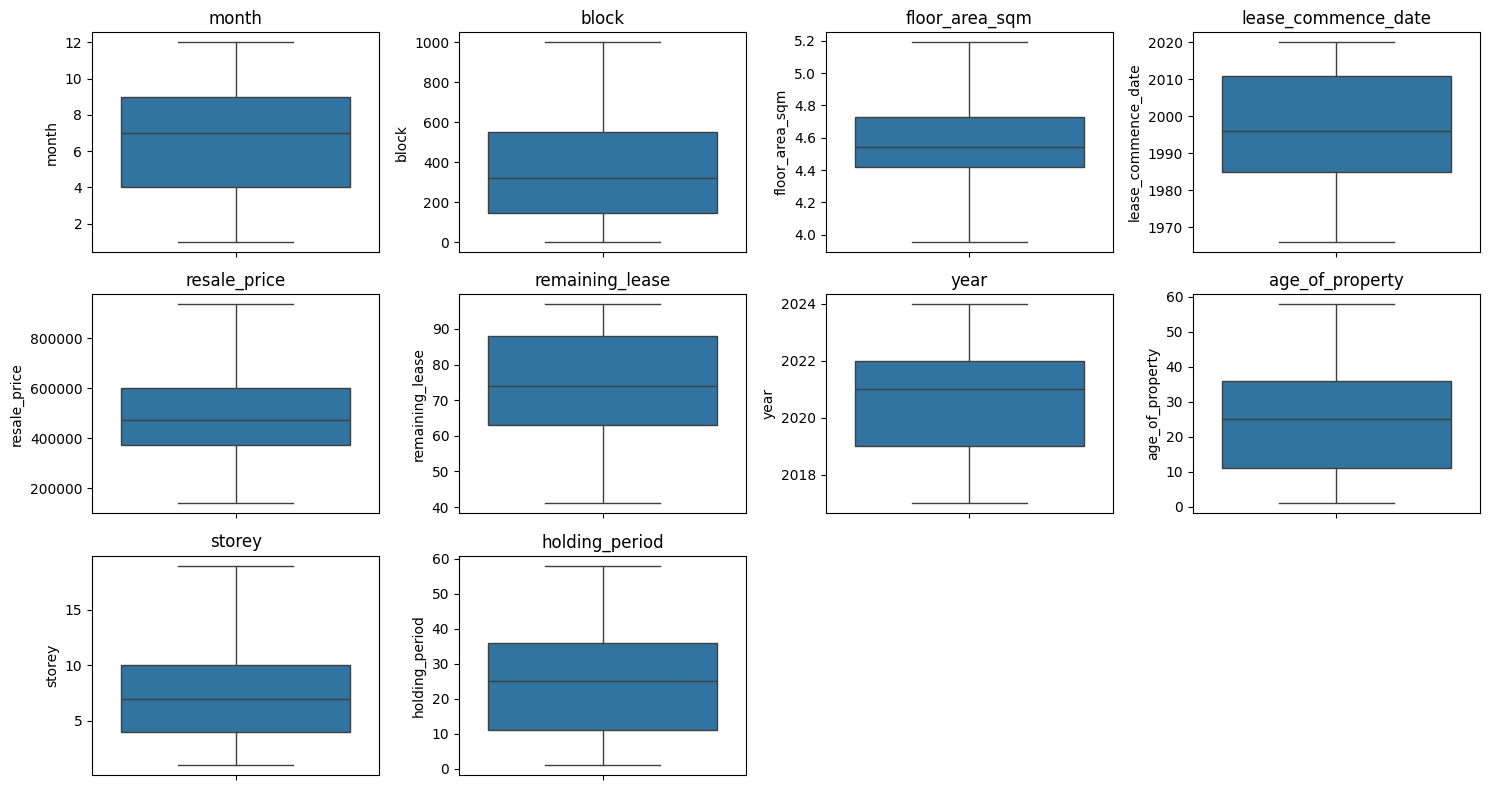

In [1040]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols.drop(['rate_per_sqm'],axis=1), 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [1041]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
0,1,ANG MO KIO,2 ROOM,406,3.956020,IMPROVED,1979,232000.0,61,2017,38,10,38,8
1,1,ANG MO KIO,3 ROOM,108,4.219508,NEW-GENERATION,1978,250000.0,60,2017,39,1,39,8


In [1042]:
df.size

2439836

In [1043]:
df.shape

(174274, 14)

In [1044]:
df['resale_price'].unique()

array([232000., 250000., 262000., ..., 630500., 534388., 458988.])

## Label Encoding ##

In [1045]:
def encode_col(df,column):
    model = LabelEncoder()
    df[column] = model.fit_transform(df[column])
    #return df[column]


In [1046]:
encode_col(df,'town')
encode_col(df,'flat_type')
encode_col(df,'flat_model')


In [1047]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
0,1,0,1,406,3.956020,5,1979,232000.0,61,2017,38,10,38,8
1,1,0,2,108,4.219508,12,1978,250000.0,60,2017,39,1,39,8


## Model Building ##

In [1048]:
X= df.drop(['resale_price'],axis=1)
y =df['resale_price']

X.shape,y.shape

((174274, 13), (174274,))

In [1049]:
y.unique()

array([232000., 250000., 262000., ..., 630500., 534388., 458988.])

In [1050]:
X =df.drop(['resale_price'],axis=1)
y = df['resale_price']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = DecisionTreeRegressor()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)



print(f" Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
#print(f"Coeff:{model.coef_}")

 Train MSE : 10241145.43797414
Test MSE : 1651384377.3996978


In [1051]:
X =df.drop(['resale_price'],axis=1)
y = df['resale_price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)



print(f" Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
#print(f"Coeff:{model.coef_}")

 Train MSE : 511794005.6197503
Test MSE : 1678636279.634777


In [1052]:
X =df.drop(['resale_price'],axis=1)
y = df['resale_price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LinearRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)



print(f" Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
print(f"Coeff:{model.coef_}")

 Train MSE : 7046494370.221989
Test MSE : 7042079214.405983
Coeff:[ 1.27430786e+03 -1.87608824e+03  3.96854143e+04 -9.89917333e+01
  3.01931645e+05 -4.66294536e+02 -4.60513284e+14 -6.74901833e+02
  4.60513284e+14 -2.33602320e+14  4.50168556e+03 -2.26910964e+14
  2.20433299e+05]


In [1053]:
feature_names = X.columns
feature_names


Index(['month', 'town', 'flat_type', 'block', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'remaining_lease', 'year', 'age_of_property',
       'storey', 'holding_period', 'rate_per_sqm'],
      dtype='object')

In [1054]:
coefficients = model.coef_
coefficients


array([ 1.27430786e+03, -1.87608824e+03,  3.96854143e+04, -9.89917333e+01,
        3.01931645e+05, -4.66294536e+02, -4.60513284e+14, -6.74901833e+02,
        4.60513284e+14, -2.33602320e+14,  4.50168556e+03, -2.26910964e+14,
        2.20433299e+05])

In [1055]:
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False).sort_values(by='Coefficient',ascending=False)
print(coeff_df)


                Feature   Coefficient
8                  year  4.605133e+14
4        floor_area_sqm  3.019316e+05
12         rate_per_sqm  2.204333e+05
2             flat_type  3.968541e+04
10               storey  4.501686e+03
0                 month  1.274308e+03
3                 block -9.899173e+01
5            flat_model -4.662945e+02
7       remaining_lease -6.749018e+02
1                  town -1.876088e+03
11       holding_period -2.269110e+14
9       age_of_property -2.336023e+14
6   lease_commence_date -4.605133e+14


In [1056]:
X =df.drop(['resale_price'],axis=1)
y = df['resale_price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = Lasso()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)



print(f" Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
print(f"Coeff:{model.coef_}")

 Train MSE : 7048455016.919125
Test MSE : 7034282959.858857
Coeff:[ 1.35255719e+03 -1.86662668e+03  4.10639939e+04 -9.86123807e+01
  2.97726569e+05 -4.16907895e+02  2.85196782e+03 -5.84212894e+02
  2.19141412e+04 -1.24522243e+02  4.48721114e+03  4.19516668e+02
  2.20037328e+05]


In [1057]:
X =df.drop(['resale_price'],axis=1)
y = df['resale_price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = Ridge()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)



print(f" Train MSE : {mean_squared_error(y_train,train_pred)}")
print(f"Test MSE : {mean_squared_error(y_test,test_pred)}")
print(f"Coeff:{model.coef_}")

 Train MSE : 7055060224.660106
Test MSE : 7008035489.317599
Coeff:[ 1.30289693e+03 -1.84846806e+03  4.01610381e+04 -9.93656333e+01
  3.00857601e+05 -3.78565649e+02  1.04486036e+04 -6.32937993e+02
  1.43679426e+04  3.91933925e+03  4.50247273e+03  3.91933925e+03
  2.19407832e+05]


## Model Saving ##

In [1058]:
with open('Regression_model.pkl',"wb") as r:
    pickle.dump(model,r)

## Model Loading ##

In [1059]:
with open('Regression_model.pkl',"rb") as r1:
    regg_model = pickle.load(r1)

In [1060]:
df.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
0,1,0,1,406,3.956020,5,1979,232000.0,61,2017,38,10,38,8
1,1,0,2,108,4.219508,12,1978,250000.0,60,2017,39,1,39,8


In [1061]:
input_data =df.iloc[1].drop('resale_price').to_numpy()
input_data

array([1.00000000e+00, 0.00000000e+00, 2.00000000e+00, 1.08000000e+02,
       4.21950771e+00, 1.20000000e+01, 1.97800000e+03, 6.00000000e+01,
       2.01700000e+03, 3.90000000e+01, 1.00000000e+00, 3.90000000e+01,
       8.00000000e+00])

In [1062]:
input_data =df.iloc[1].drop('resale_price').to_numpy()
re_sale_price_prediction = regg_model.predict([input_data])
print(f"Resale_price : {re_sale_price_prediction[0]:.2f}")


Resale_price : 240078.36


In [1063]:
df.shape

(174274, 14)

In [1064]:
df.index

RangeIndex(start=0, stop=174274, step=1)

In [1065]:
df.tail(5)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
174269,9,25,5,358,4.990433,7,1988,850000.0,62,2024,36,1,36,8
174270,9,25,5,361,4.990433,7,1988,800000.0,62,2024,36,1,36,8
174271,9,25,5,606,4.997212,3,1987,770000.0,62,2024,37,1,37,8
174272,9,25,5,641,5.105945,3,1992,937500.0,66,2024,32,7,32,8
174273,9,25,5,824,4.990433,7,1987,893888.0,62,2024,37,1,37,8


In [1066]:
input_data =df.iloc[174273].drop('resale_price').to_numpy()
re_sale_price_prediction = regg_model.predict([input_data])
print(f"Resale_price : {re_sale_price_prediction[0]:.2f}")


Resale_price : 665128.39


In [ ]:
for index in df.index[0:]:
    input_data =df.iloc[index].drop('resale_price').to_numpy()
    re_sale_price_prediction = regg_model.predict([input_data])
    print(f"Resale_price : {re_sale_price_prediction[0]}")

In [1067]:
def re_sale_price(input_data):
    input_data_array = np.array(input_data)
    re_sale_price_prediction = regg_model.predict(input_data)
    return "Resale_price:",re_sale_price_prediction[0]
     

In [1068]:
df.tail()

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,age_of_property,storey,holding_period,rate_per_sqm
174269,9,25,5,358,4.990433,7,1988,850000.0,62,2024,36,1,36,8
174270,9,25,5,361,4.990433,7,1988,800000.0,62,2024,36,1,36,8
174271,9,25,5,606,4.997212,3,1987,770000.0,62,2024,37,1,37,8
174272,9,25,5,641,5.105945,3,1992,937500.0,66,2024,32,7,32,8
174273,9,25,5,824,4.990433,7,1987,893888.0,62,2024,37,1,37,8


In [1069]:
input_data =df.iloc[174271].drop('resale_price').to_numpy()

In [1070]:
re_sale_price([input_data])

('Resale_price:', 690344.077921249)